## Problem Statement:
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- The company wants to know the following things about the prospective properties:
    - Which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.

## 1. Importing Required Libraries

In [1]:
# importing Required libraries for our Analysis

import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter warnings: import warnings to avoid unnecessary runtime warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# using pandas setoption to display all the columns and rows to have a clear view of data in  further steps

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2.Reading the train.csv file 

In [3]:
# Importing the csv file and storing in data variable,And displaying the top5 rows of data

data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3.Data Description

In [4]:
#Shape of the dataframe

data.shape

(1460, 81)

## Observation:
- We have 1460 rows and 81 columns

In [5]:
# statistical Description of the data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Insights:
- From the above statistical descripton count of some numerical columns are less than the normal count of 1460.
- `LotFrontage`,`MasvnrArea` and `GarageYrBlt` features required null value treatment which will be done in further steps

In [6]:
# Display non-null count ,datatype of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Insights:
- Total number of features we have is 81.
- We have Features containing datatype of `int`,`object` and `float`
- We can see see some of the columns have null values.we will treat them in further steps.some of them are `PoolQc`,`Fencce`,`MiscFeature`

## 4.Data Preparation and EDA

In [7]:
# Display the Percentage of null values present in each column(or) feature

data.isnull().sum()/data.shape[0]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

## Insights:
- In the above step we have clear view of null value percentage of each feature in our dataset

In [8]:
# lets sort the Percentage of null values for easy represenataion of the data
#nullval_per holds null value percentage of each column

nullval_per=data.isnull().sum()/data.shape[0]
nullval_per.sort_values(ascending=False)[:20]   #Display the column names of Top 20 highest null value percentage

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

## Insights:

- In the above step we are displaying the features null value percentage in descending order.
- Lets drop features/columns having null value percentage greater than 30

In [9]:
# Considering only the columns with less than 30 percentage of null values for our analysis
newcolumns=nullval_per[nullval_per<0.3]
newcolumns

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [10]:
# Create a new dataframe `data2` considering features where null value percentage is less than 30 percent
data2=data[newcolumns.index]
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Insights:
- We have created new dataframe called `data2` which holds features where null value percentage is less than 30

In [11]:
# Dropping id column
data2=data2.iloc[:,1:]
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
data2.shape

(1460, 75)

# Insights:
- Id column has been dropped since it will not help in our analysis considering this feature may mislead the analysis
- we are having 75 columns/features,lets consider further analysis

## Null value Treatment

In [13]:
# `NullValuecolumns` here holds the features having null value percentage greater than 0
nullval_per=data2.isnull().sum()/data2.shape[0]
NullValuecolumns=nullval_per[nullval_per>0.0].sort_values(ascending=False)
print(NullValuecolumns)
print()
print("Count of features having null values:",len(NullValuecolumns))

LotFrontage     0.177397
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageYrBlt     0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Count of features having null values: 14


## Insights:
- We have 14 features having null vlaues in it.
- In the next step all the features names will be displayed 

In [14]:
NullValuecolumns.index

Index(['LotFrontage', 'GarageCond', 'GarageQual', 'GarageFinish',
       'GarageYrBlt', 'GarageType', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical'],
      dtype='object')

In [15]:
# Lets understand the datatype of the column,which helps us in treating outliers on the same

data2[NullValuecolumns.index].dtypes

LotFrontage     float64
GarageCond       object
GarageQual       object
GarageFinish     object
GarageYrBlt     float64
GarageType       object
BsmtFinType2     object
BsmtExposure     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

## Insights:
- We can treat the outliers present in the above column since now we are aware of teh datatype of that feature
- We will follow the following approach :
    - Columns having null values in  `Numerical` columns will be replaced with Median values of that feature.
    - Columns having null values in  `Categorical` columns will be replaced based on the information we have from data dictionary

In [16]:
# Treat the numeric columns by replacing nan values with median values

data2['LotFrontage'] = data2['LotFrontage'].replace(np.NaN,data2['LotFrontage'].median())
data2['MasVnrArea'] = data2['MasVnrArea'].replace(np.NaN,data2['MasVnrArea'].median())
data2['GarageYrBlt'] = data2['GarageYrBlt'].replace(np.NaN,data2['GarageYrBlt'].median())

In [17]:
# Lets verify the null value count after performing null value treatment in the previous step

data2[['LotFrontage','MasVnrArea','GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

##  Insights:
- Null values in the above numeical columns has been treated successfully.

In [18]:
# Lets validate Nullvalue percentage again
nullval_per=data2.isnull().sum()/data2.shape[0]
NullValuecolumns=nullval_per[nullval_per>0.0].sort_values(ascending=False)
NullValuecolumns

GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

## Insights:
- Lets treat the above categorical values in the next steps in  which null values has been observed as shown above

## Lets visualize the categorical features

In [19]:
NullValuecolumns.index

Index(['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrType', 'Electrical'],
      dtype='object')

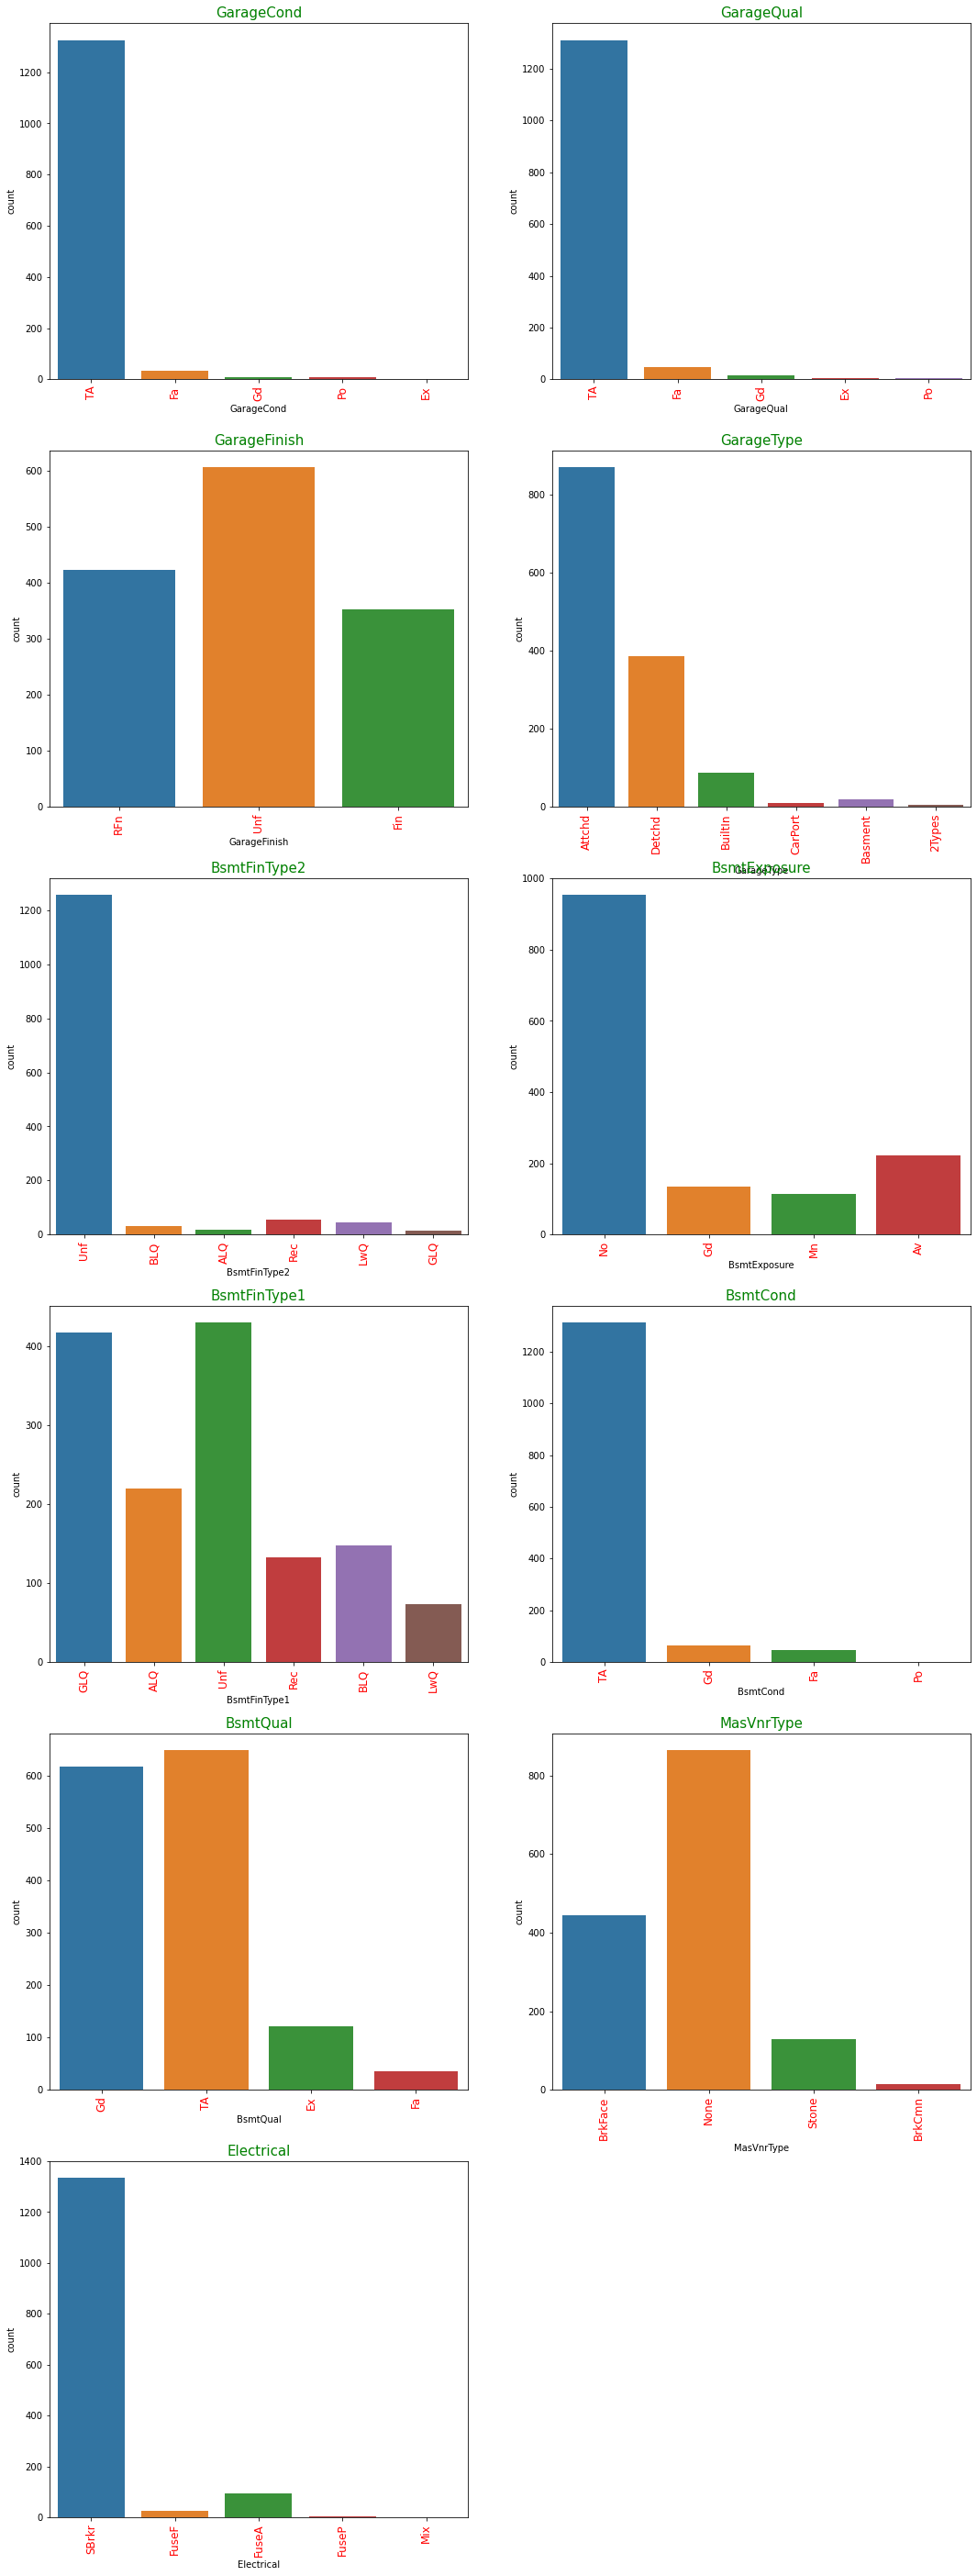

In [20]:
## All the abve columns will be visualised to understand the spread of categories in the categorical features
counter=range(1,len(NullValuecolumns)+1)
plt.figure(figsize=(18,50))
for i,j in zip(NullValuecolumns.index,counter):
    plt.subplot(6,2,j)
    plt.title(i,fontdict={'fontsize':15,'color':'green'})
    sns.countplot(i,data=data2)
    plt.xticks(rotation=90,size=12,color='red')  
plt.show()

In [21]:
# From data dictionary we know that nan values in these columns indicate No Garage so lets replace nan values with NoGarage category
#  In the following categories : 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',Lets replace nan values with `No garage` categroy

data2['GarageCond']=data2['GarageCond'].replace(np.NaN,'No Garage')
data2['GarageQual']=data2['GarageQual'].replace(np.NaN,'No Garage')
data2['GarageFinish']=data2['GarageFinish'].replace(np.NaN,'No Garage')
data2['GarageType']=data2['GarageType'].replace(np.NaN,'No Garage')

## Insights:
- We have treated null values present in the Garage related columns and treated nan values with `No Garage` Category

In [22]:
# From data dictionary we know that nan values in these columns indicate No basement so lets replace nan values with No Basement category
# In the following categories : 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',Lets replace nan values with `No Basement` categroy

data2['BsmtFinType2']=data2['BsmtFinType2'].replace(np.NaN,'No Basement')
data2['BsmtExposure']=data2['BsmtExposure'].replace(np.NaN,'No Basement')
data2['BsmtFinType1']=data2['BsmtFinType1'].replace(np.NaN,'No Basement')
data2['BsmtCond']=data2['BsmtCond'].replace(np.NaN,'No Basement')
data2['BsmtQual']=data2['BsmtQual'].replace(np.NaN,'No Basement')

## Insights:
- We have treated null values present in the Garage related columns and replaced nan values with ` No Basement` category

In [23]:
 # Replacing nan values with mode(Highests occurence) value

data2['MasVnrType']=data2['MasVnrType'].replace(np.NaN,data2['MasVnrType'].mode()[0])
data2['Electrical']=data2['Electrical'].replace(np.NaN,data2['Electrical'].mode()[0])

## Insights:
- Replacing nan values in `MasVnrType` an `Electrical` with highest occurence category in the features

In [24]:
## Lets validate the null value count 
print(data2.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## Insights:
- As shown above null value count is 0 in all the features

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Insights:
- As shown above all the 75 features are now validated for null values and no null values are present in the above features,lets continue our analysis

In [26]:
# From data dictionary we know that feature: MSSubClass is a categorical column represented in numerical form lets convert back to original representation which helps in EDA


data2['MSSubClass']=data2['MSSubClass'].replace(
    {20:'1-STORY 1946 & NEWER ALL STYLES',
     30:'1-STORY 1945 & OLDER',
     40:'1-STORY W/FINISHED ATTIC ALL AGES',
     45:'1-1/2 STORY - UNFINISHED ALL AGES',
     50:'1-1/2 STORY FINISHED ALL AGES',
     60:'2-STORY 1946 & NEWER',
     70:'2-STORY 1945 & OLDER',
     75:'2-1/2 STORY ALL AGES',
     80:'SPLIT OR MULTI-LEVEL',
     85:'SPLIT FOYER',
     90:'DUPLEX - ALL STYLES AND AGES',
     120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
     150:'1-1/2 STORY PUD - ALL AGES',
     160:'2-STORY PUD - 1946 & NEWER',
     180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
     190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

## Insights:
- Feature: `MSSubClass` is a categorical column represented in numerical form lets convert back to original representation which helps in EDA


In [27]:
## Lets treat `OverallQual` and `OverallCond` whicha re in numericla in nature but from data dictionary they represnt cateories of goodness measure
# values is a reusable method which when called convert the features into categories when numerical columns where given

values={10:'Very Excellent',
 9:'Excellent',
 8:'Very Good',
 7:'Good',
 6:'Above Average',
 5:'Average',
 4:'Below Average',
 3:'Fair',
 2:'Poor',
 1:'Very Poor'
}

## Insights:
- Reusable methods are created which helps in converting the features `overallQual` and `overallcond` to its original format specified in data dictionary

In [28]:
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house

data2['OverallQual']=data2['OverallQual'].replace(values)
data2['OverallCond']=data2['OverallCond'].replace(values)

In [29]:
data2[['MSSubClass','OverallQual','OverallCond']].head()

,MSSubClass,OverallQual,OverallCond
0,2-STORY 1946 & NEWER,Good,Average
1,1-STORY 1946 & NEWER ALL STYLES,Above Average,Very Good
2,2-STORY 1946 & NEWER,Good,Average
3,2-STORY 1945 & OLDER,Good,Average
4,2-STORY 1946 & NEWER,Very Good,Average


In [30]:
data2[['MSSubClass','OverallQual','OverallCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1460 non-null   object
 1   OverallQual  1460 non-null   object
 2   OverallCond  1460 non-null   object
dtypes: object(3)
memory usage: 34.3+ KB


## Insights:
- We have treated the nan values and converted features like `MsSubClass`,`OverallQual` and `OverallCond` to the required format for further analysis

In [31]:
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


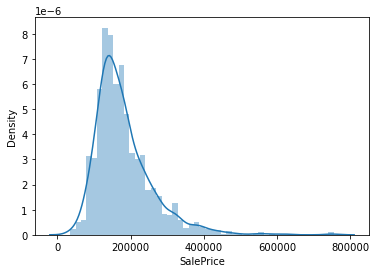

In [32]:
## Lets have a check at Target Column : SalePrice
# lets plot distribution plot for the target column 

sns.distplot(data2['SalePrice'])
plt.show()

## Insights:
- As observed data is right skewed and this is quite common in `SalesPrice` columns where few products/houses will have higher price  due to various factors.
- We need to treat this else model will get impacted because of the skewed data

In [33]:
data2['SalePrice']=np.log(data2['SalePrice'])
data2['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

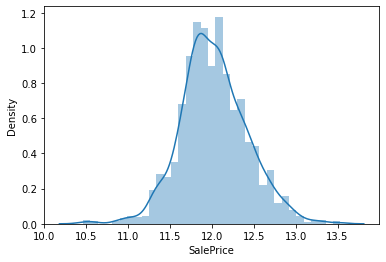

In [34]:
# Lets visualise the distribution plot for saleprice feature afer aplying tge log transfrmation
sns.distplot(data2['SalePrice'])
plt.show()

## Insights:
- As observed in the above distribution plot we have reduceed the skewness of teh data by applying log transformation.
- Due to this transformation we have a better results and results may not get deviated.
- The scale o the salesprice has changed drastically after transformation 

In [35]:
data2.shape

(1460, 75)

### Lets validate the integer and categorical columns and visualise them seperately using the plots

In [36]:
# Print the Features having integer and float datatype
data2.select_dtypes(include=['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [37]:
# Length of the numericla features
len(data2.select_dtypes(include=['int64','float64']).columns)

34

In [38]:
# Print the features having numerical datatype 
data2[data2.select_dtypes(include=['int64','float64']).columns].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [39]:
# Print the features having categorical datatype

categorical_columns= data2.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [40]:
#Length of categirical columns in our dataset
len(categorical_columns)

41

## Insights:
- In total we have 41 categorical columns lets visualise them to understand the count of categories present in them 
- In total we have 34 numerical fearures including Target feature which is in numerical format

## Lets understand how SalePrice is varied for various categorical columns

In [41]:
# Reusable method for countplot

def countplot(feature,rotation):
    plt.title(feature,size=14,color='green')           # Prints the tite for the plot
    sns.countplot(x=feature,data=data2)  # creates a countplot for the given categorical column
    plt.xticks(rotation=90)              # x- axis labels are rotated with the user given degree value
plt.show()

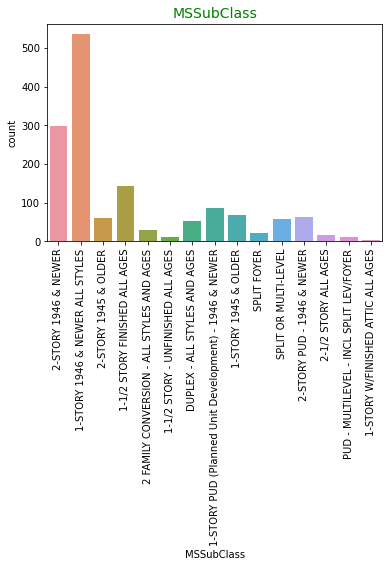

In [42]:
# Countplot for `MSSubClass`
# The plot displays the categories present in the feature and its count

countplot('MSSubClass',90)

## Insights:
- As shown above feature `MSSubClass` has multple categories and few categories like `1-STORY W/FINISHED ATTIC ALL AGES` has very less count in the feature

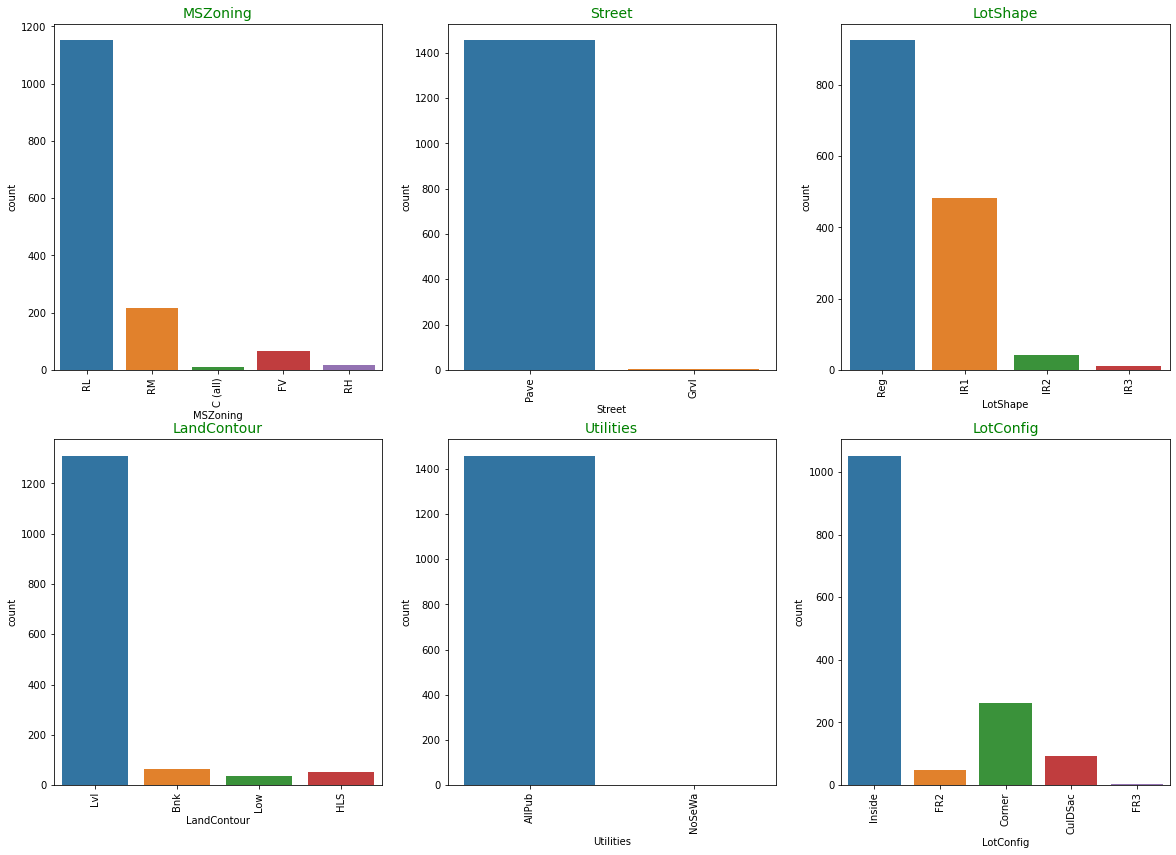

In [43]:
# Countplot for `MSZoning`,`Street`,`LotShape`,`LandCounter`,`Utilities` and `LotConfig` are shown below
# The plot displays the categories present in the feature and its count

plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
countplot('MSZoning',90)

plt.subplot(2,3,2)
countplot('Street',90)


plt.subplot(2,3,3)
countplot('LotShape',90)

plt.subplot(2,3,4)
countplot('LandContour',90)

plt.subplot(2,3,5)
countplot('Utilities',90)


plt.subplot(2,3,6)
countplot('LotConfig',90)

plt.show()

## Insights:
- As shown above `Street`,`Utilities` and `LandContour` are highly skewed to a single category and considerng them in our model may not bring good results.
- As shown above `MSZoning` has categories calledd `RH` and `C(all)` which we can consider as a seperate category called others since its presence is very less in the category
- As shown above `LotConfig` has categories calledd `FR2` and `FR3` which we can consider as a seperate category called others since its presence is very less in the category

In [44]:
#creating as special category called `others` for the following features

data2['MSZoning'].replace(['RH','C (all)'],'others',inplace=True)
data2['LotConfig'].replace(['FR2','FR3'],'others',inplace=True)

In [45]:
# Lets drop Street and Utilities colum since they are highly skewed to a single category and downt help in our analysis

data2.drop(['Street','Utilities','LandContour'],axis=1,inplace=True)

## Insights:
- we have dropped few columns wth the reason mentioned above and few catgeories has been treated seperately as shown above

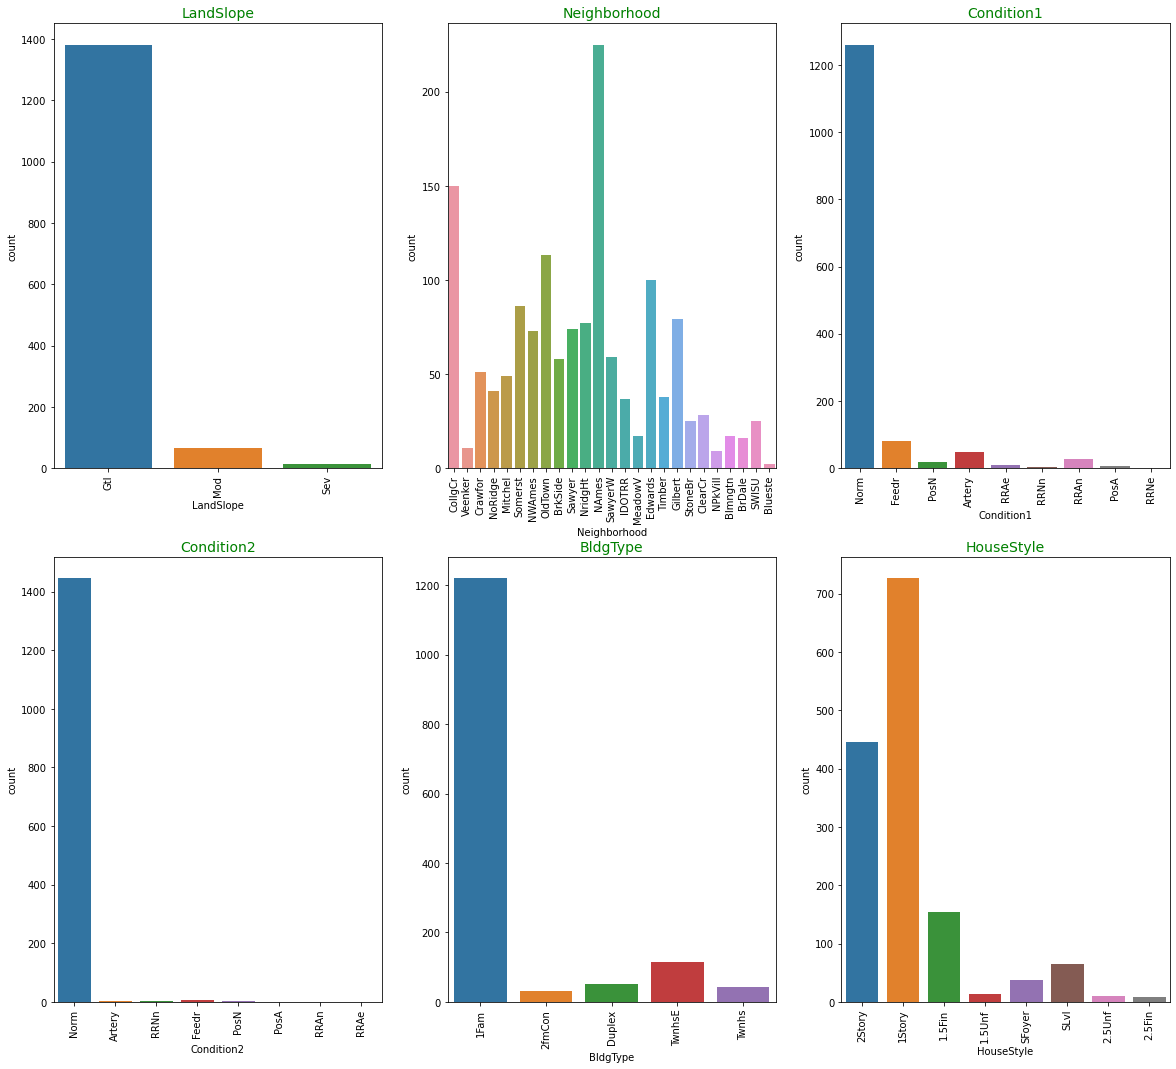

In [46]:
#LandSlope', 'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle'.

plt.figure(figsize=(20,18))

plt.subplot(2,3,1)
countplot('LandSlope',90)

plt.subplot(2,3,2)
countplot('Neighborhood',90)

plt.subplot(2,3,3)
countplot('Condition1',90)

plt.subplot(2,3,4)
countplot('Condition2',90)

plt.subplot(2,3,5)
countplot('BldgType',90)

plt.subplot(2,3,6)
countplot('HouseStyle',90)

plt.show()

## Insights:
- As shown above `LandSlope` and `Condition2` are highly skewed to a single category and considerng them in our model may not bring good results.
- As shown above `Condition1` feature has categories called 'RRAe','PosA','RRNn','RRNe' which we can consider as a seperate category called `others` since its presence is very less in the category


In [47]:
data2['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [48]:
data2['Condition1'].replace(['RRAe','PosA','RRNn','RRNe'],'others',inplace=True)

In [49]:
# Lets drop condition2 column since it is highly skewed to a single category

data2.drop(['LandSlope','Condition2'],axis=1,inplace=True)

## Insights:
- we have dropped few columns wth the reason that single category is biased in the categorical column few catgeories has been considered as `others` cateory which can be treated seperately.

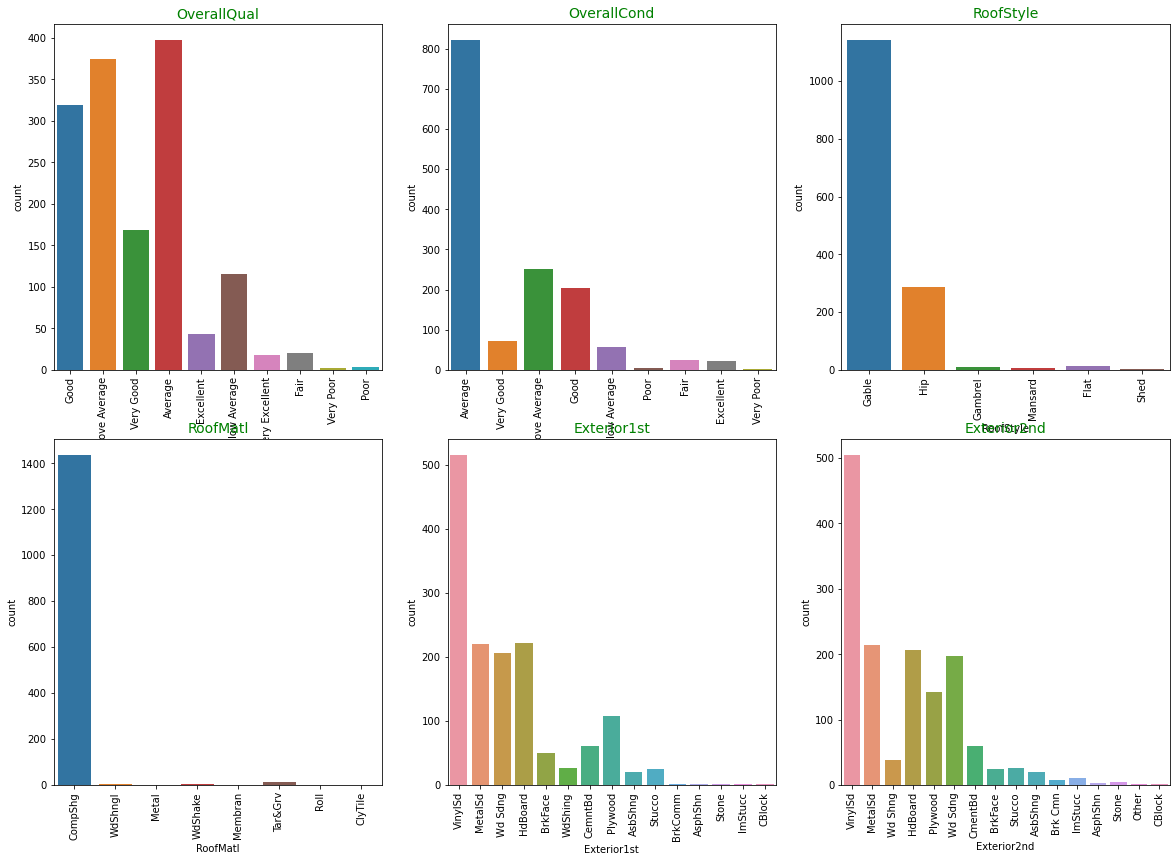

In [50]:
 # 'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'
    
    
plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
countplot('OverallQual',90)

plt.subplot(2,3,2)
countplot('OverallCond',90)

plt.subplot(2,3,3)
countplot('RoofStyle',90)

plt.subplot(2,3,4)
countplot('RoofMatl',90)

plt.subplot(2,3,5)
countplot('Exterior1st',90)

plt.subplot(2,3,6)
countplot('Exterior2nd',90)

plt.show()

## Insights:
- As shown above `RoofMatl`is highly skewed to a single category and considerng it in our model may not bring good results,so lets drop this fetaure.S lets drop them in the next steps.
- As shown above `Exterior1st` feature has categories called 'BrkComm','Stone','AsphShn','CBlock','ImStucc' which we can consider as a seperate category called `others` since its presence is very less in the category.We need to do this because these low presence of categories in the data can mislead or bias the data
- As shown above `Exterior2nd` feature has categories called 'ImStucc','BrkComm','Stone','AsphShn','CBlock','ImStucc' which we can consider as a seperate category called `others` since its presence is very less in the category.We need to do this because these low presence of categories in the data can mislead or bias the data


In [51]:
data2['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'others',inplace=True)

## Insights:
- As shown above `RoofStyle` feature has categories called 'Flat','Gambrel','Mansard','Shed' which we can consider as a seperate category called `others` since its presence is very less in the category.We need to do this because these low presence of categories in the data can mislead or bias the data


In [52]:
data2['Exterior1st'].replace(['BrkComm','Stone','AsphShn','CBlock','ImStucc'],'others',inplace=True)

In [53]:
data2['Exterior2nd'].replace(['ImStucc','BrkComm','Stone','AsphShn','CBlock','ImStucc'],'others',inplace=True)

In [54]:
data2.drop('RoofMatl',axis=1,inplace=True)

## Insights:
- we have dropped few columns wth the reason that single category is biased in the categorical column few catgeories has been considered as `others` cateory which can be treated seperately.

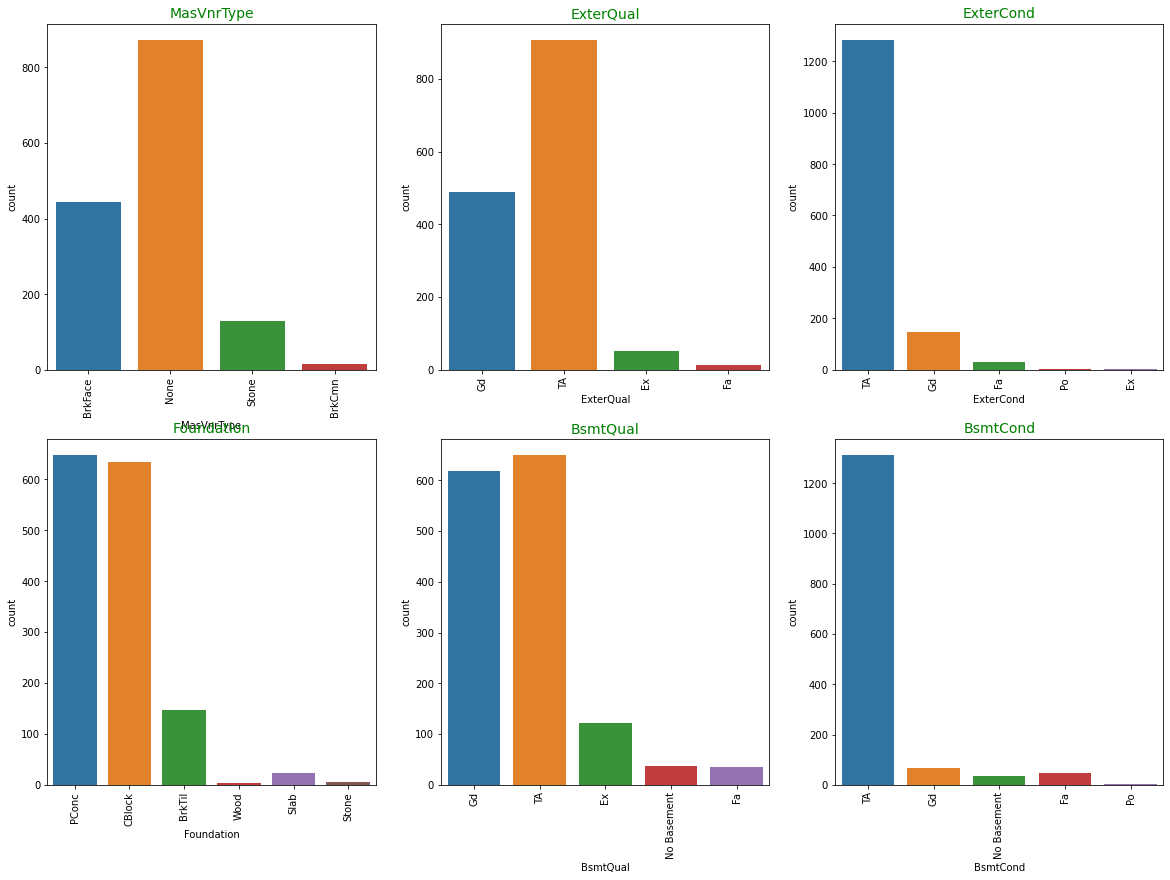

In [55]:
 # 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond' 
    
plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
countplot('MasVnrType',90)

plt.subplot(2,3,2)
countplot('ExterQual',90)

plt.subplot(2,3,3)
countplot('ExterCond',90)

plt.subplot(2,3,4)
countplot('Foundation',90)

plt.subplot(2,3,5)
countplot('BsmtQual',90)

plt.subplot(2,3,6)
countplot('BsmtCond',90)

plt.show()

## Insights:
- As shown above `Foundation` feature has categories called 'Slab','Stone','Wood' which we can consider as a seperate category called `others` since its presence is very less in the category.We need to do this because these low presence of categories in the data can mislead or bias the data
- Presenceof other categorical is not very biased so we havent considered any special tret=atment for them

In [56]:
data2['Foundation'].replace(['Slab','Stone','Wood'],'others',inplace=True)

In [57]:
data2.drop(['BsmtCond','ExterCond'],axis=1,inplace=True)

## Insights:
- we have dropped few columns with the reason that single category is biased in the categorical column few catgeories has been considered as `others` cateory which can be treated seperately.

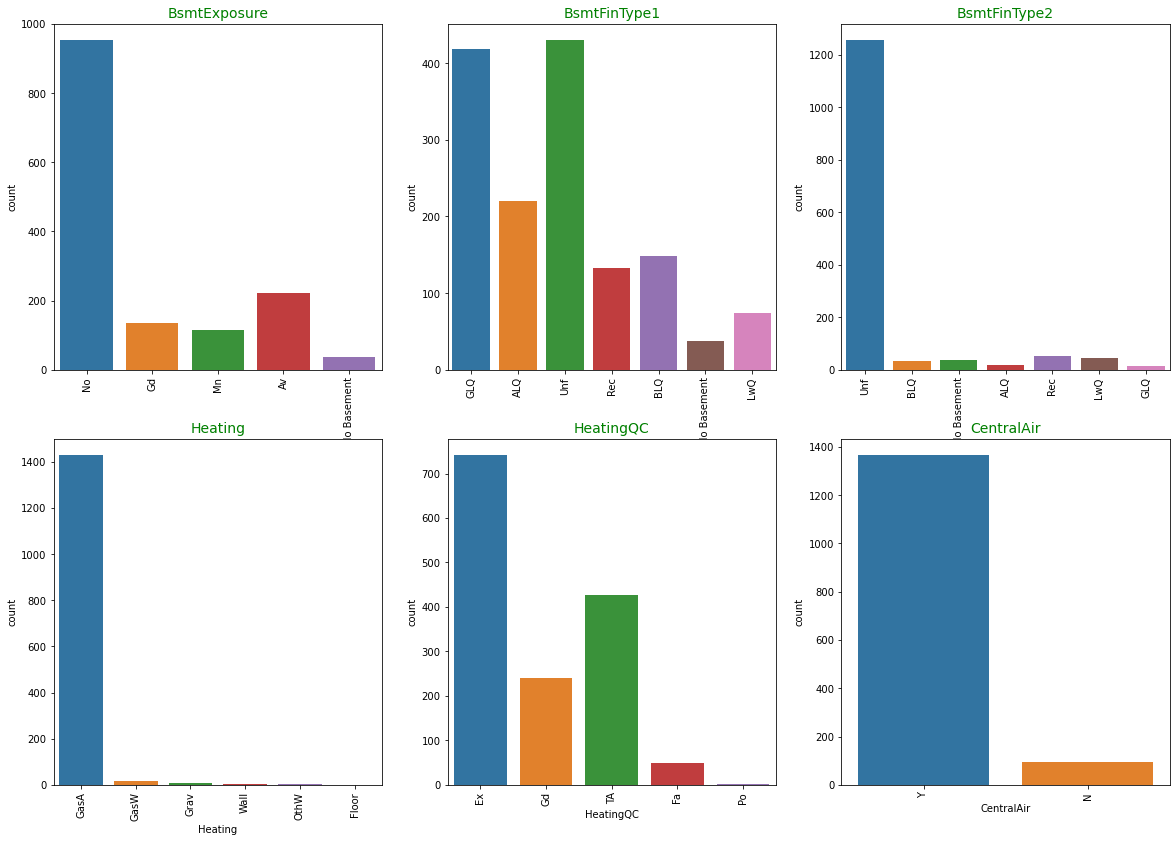

In [58]:
 # 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir' 

plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
countplot('BsmtExposure',90)

plt.subplot(2,3,2)
countplot('BsmtFinType1',90)

plt.subplot(2,3,3)
countplot('BsmtFinType2',90)

plt.subplot(2,3,4)
countplot('Heating',90)

plt.subplot(2,3,5)
countplot('HeatingQC',90)

plt.subplot(2,3,6)
countplot('CentralAir',90)

plt.show()

In [59]:
data2['HeatingQC'].replace(['Fa','Po'],'others',inplace=True)

## Insights:
- As shown above `HeatingQC` feature has categories called 'Fa','Po' which we can consider as a seperate category called `others` since its presence is very less in the category.We need to do this because these low presence of categories in the data can mislead or bias the data
- Presenceof other categorical is not very biased so we havent considered any special tret=atment for them

In [60]:
data2.drop(['Heating','CentralAir','BsmtFinType2'],axis=1,inplace=True)

## Insights:
- we have dropped few columns with the reason that single category is biased in the categorical column few catgeories has been considered as `others` cateory which can be treated seperately.

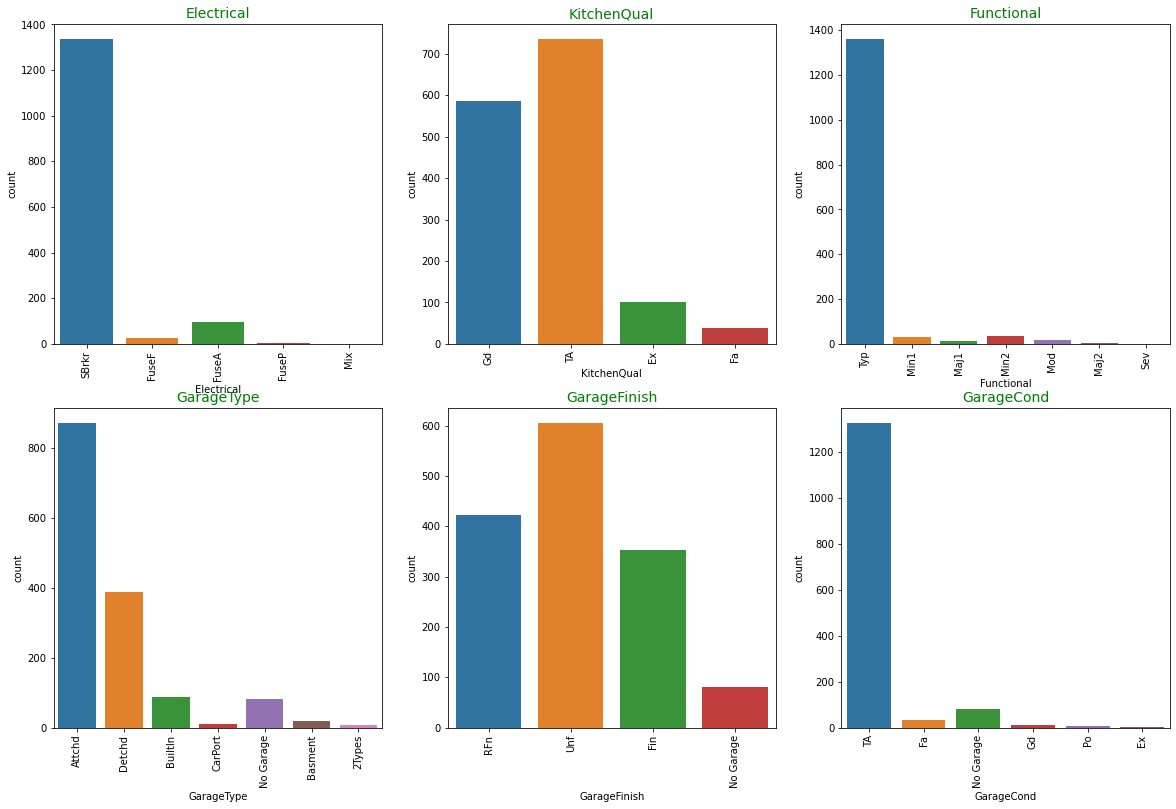

In [61]:
# 'Electrical', 'KitchenQual', 'Functional', 'GarageType' ,'GarageFinish', 'GarageQual',


plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
countplot('Electrical',90)

plt.subplot(3,3,2)
countplot('KitchenQual',90)

plt.subplot(3,3,3)
countplot('Functional',90)

plt.subplot(3,3,4)
countplot('GarageType',90)

plt.subplot(3,3,5)
countplot('GarageFinish',90)

plt.subplot(3,3,6)
countplot('GarageCond',90)

plt.show()

## Insights:
- As observed form the plots `Functional` feature has highly skewed data since majority of the data belongs to single category

In [62]:
# Cunt of different categories in `GarageType`
data2['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [63]:
data2['GarageType'].replace(['Basment','CarPort','2Types'],'others',inplace=True)

## Insights:
- As shown above `GarageType` feature has categories called 'Basment','CarPort','2Types' which we can consider as a seperate category called `others` since its presence is very less in the category.We need to do this because these low presence of categories in the data can mislead or bias the data
- Presenceof other categorical is not very biased so we havent considered any special treatment for them

In [64]:
## As observed above itsbetter to drop the functional column

data2.drop(['Electrical','Functional','GarageCond'],axis=1,inplace=True)

## Insights:
- we have dropped few columns with the reason that single category is biased in the categorical column few catgeories has been considered as `others` cateory which can be treated seperately.

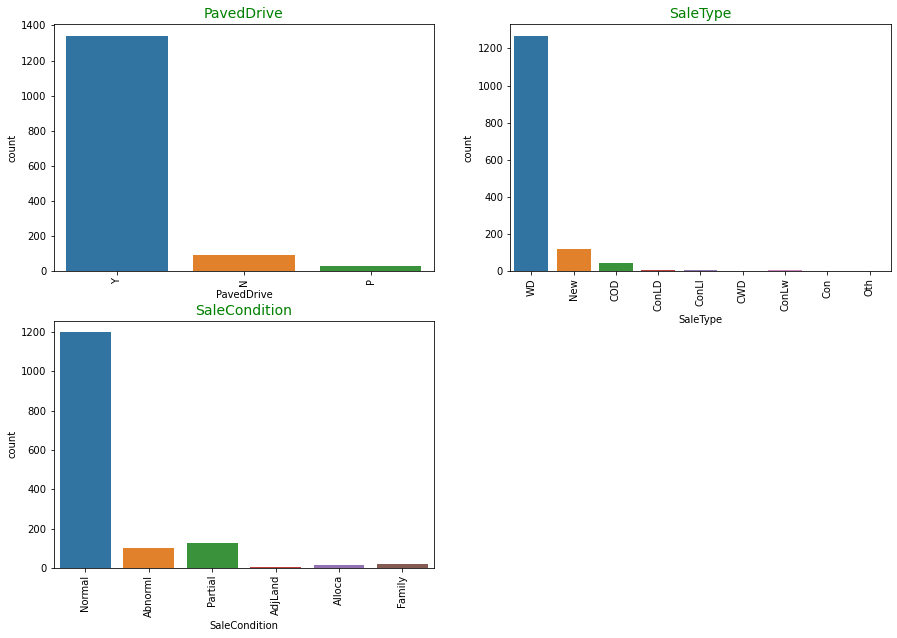

In [65]:
#'PavedDrive', 'SaleType', 'SaleCondition'

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
countplot('PavedDrive',90)

plt.subplot(2,2,2)
countplot('SaleType',90)


plt.subplot(2,2,3)
countplot('SaleCondition',90)

plt.show()

In [66]:
data2['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others',inplace=True)

## Insights:
- As shown above `SaleCondition` feature has categories called 'Family','Alloca','AdjLand' which we can consider as a seperate category called `others` since its presence is very less in the category.We need to do this because these low presence of categories in the data can mislead or bias the data
- Presence of other categorical is not very biased so we havent considered any special treatment for them

In [67]:
# Lets drop the below columns/features since we have very less count for other categories and Category: WD is highly occuring in this column

data2.drop('SaleType',axis=1,inplace=True)
data2.drop('PavedDrive',axis=1,inplace=True)

## Insights:
- As shown above we have dropped few columns with the reason that single category is biased in the categorical column few catgeories has been considered as `others` cateory which can be treated seperately.

In [68]:
# categorical columns

categorical_columns= data2.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleCondition'],
      dtype='object')

In [69]:
len(categorical_columns)

25

## Insights:
- As shown above now we have 25 categorical columns earlier the count was 41 since we dropped some categorical columns we are left with 25.
- The reason behind dropping of some categorical columns has been mentioned in the abive steps where the presence of single catgeory in the categorical column tell the same info to the model, Considering his we have dropped fewof the features.

## Lets see the relation between categorical columns and  SalesPrice using BoxPlot

In [70]:
# Reusable method to create the box plot in finding the relation between categorical column and Saleprice(Target) column
def boxplot(inputfeature,rotation):
    plt.title(inputfeature+' v/s SalePrice',size=15,color='green')
    sns.boxplot(x=inputfeature,y='SalePrice',data=data2)
    plt.xticks(rotation=rotation)
plt.show()

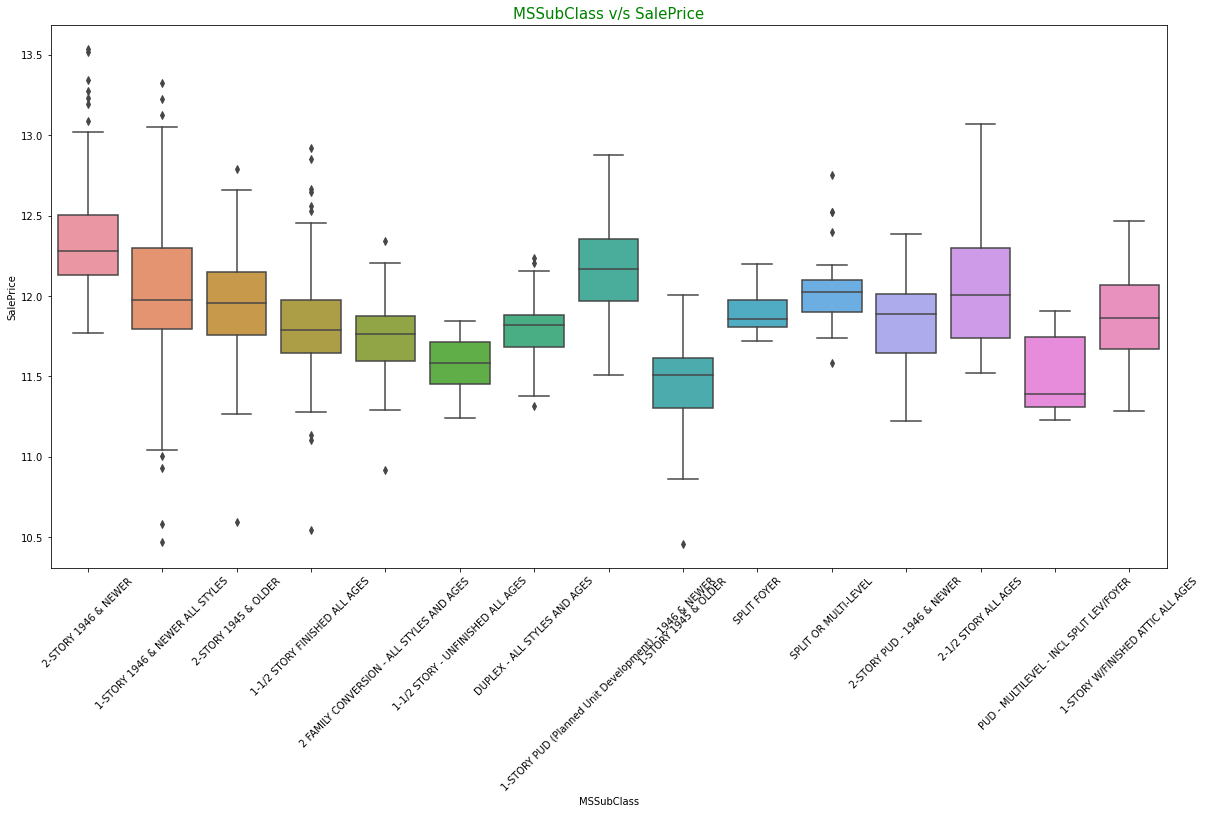

In [71]:
plt.figure(figsize=(20,10))
boxplot('MSSubClass',45)

## Insights:
- A s shown above feature `MsSubClass` has many categories and its showing the good relation with Saleprice(target) column
- we could see that sale price is more when  categories fall under this categories: `2-STORY 1946 & NEWER` and `1-STORY 1946 & NEWER ALL STYLES`

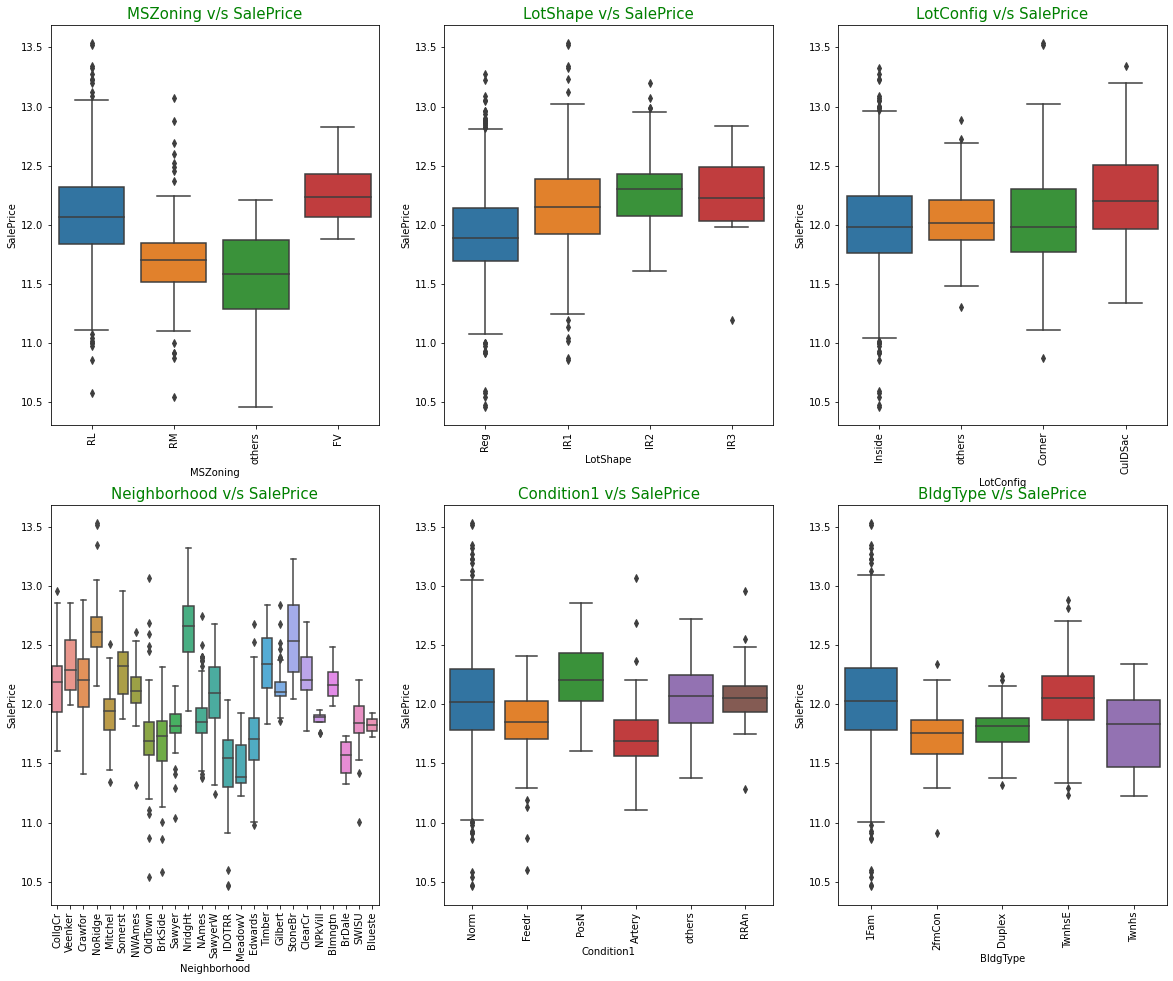

In [72]:
 #  Box plot for `Sale Price versus 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood','Condition1', 'BldgType',
plt.figure(figsize=(20,25))

plt.subplot(3,3,1)
boxplot('MSZoning',90)

plt.subplot(3,3,2)
boxplot('LotShape',90)

plt.subplot(3,3,3)
boxplot('LotConfig',90)

plt.subplot(3,3,4)
boxplot('Neighborhood',90)

plt.subplot(3,3,5)
boxplot('Condition1',90)

plt.subplot(3,3,6)
boxplot('BldgType',90)


plt.show()

## Insights:
- As shown above we have plotted  `Sale Price` versus `MSZoning`,`LotShape`,`LotConfig`,`Neighborhood`,`Condition1`,`BldgType`. We may get good information from these features and can obtain best results in predicting the Saleprice.

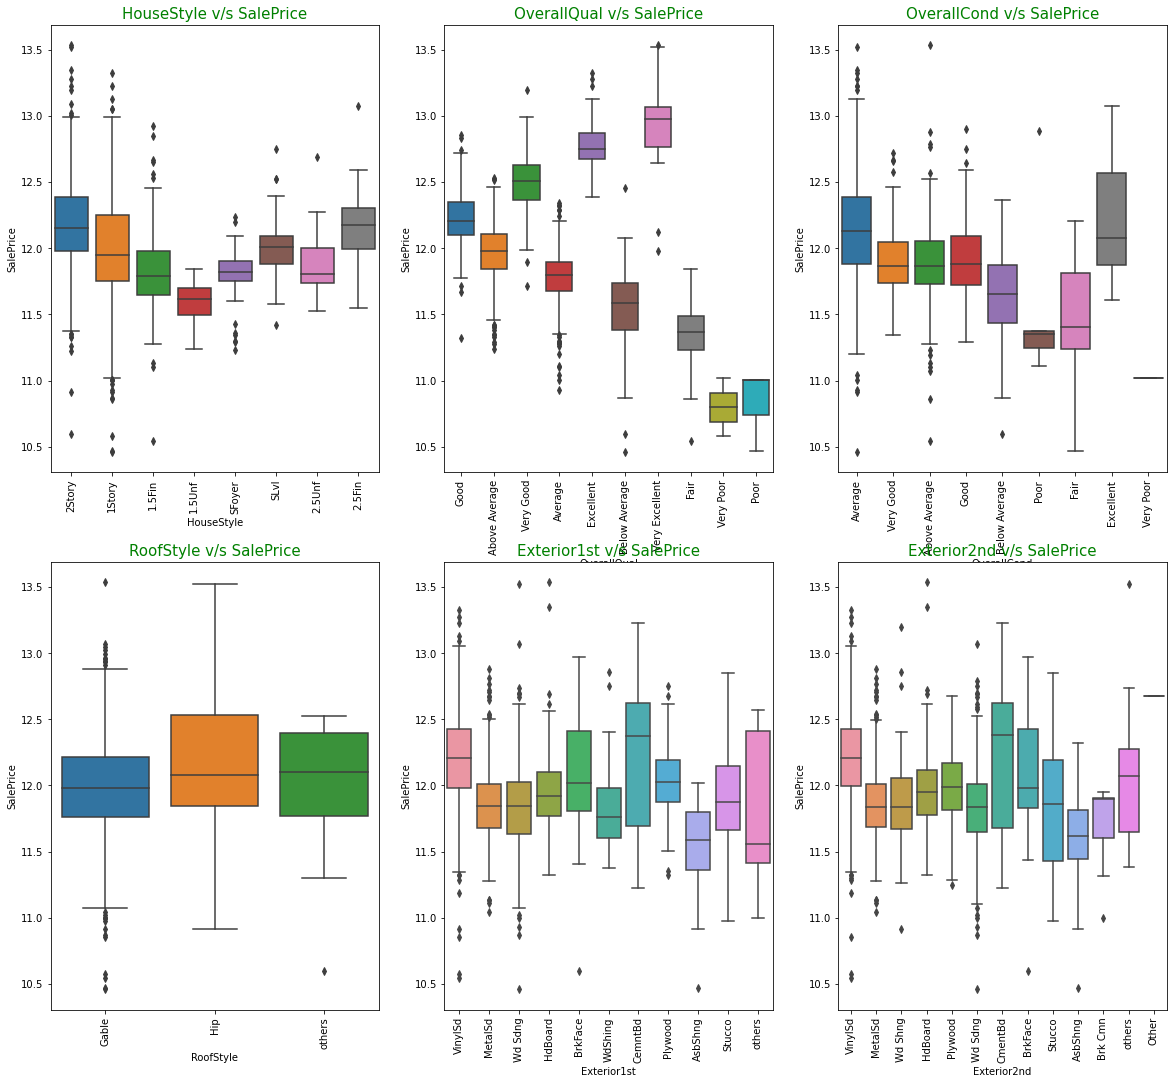

In [73]:
 #  Box plot for `Sale Price` versus 'HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'Exterior1st', 'Exterior2nd'
plt.figure(figsize=(20,28))

plt.subplot(3,3,1)
boxplot('HouseStyle',90)

plt.subplot(3,3,2)
boxplot('OverallQual',90)

plt.subplot(3,3,3)
boxplot('OverallCond',90)

plt.subplot(3,3,4)
boxplot('RoofStyle',90)

plt.subplot(3,3,5)
boxplot('Exterior1st',90)

plt.subplot(3,3,6)
boxplot('Exterior2nd',90)


plt.show()

## Insights:
- As shown above we have plotted  `Sale Price` versus 'HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'Exterior1st', 'Exterior2nd'.
- RoofStyle median looks somethings suspicious has outliers as well.

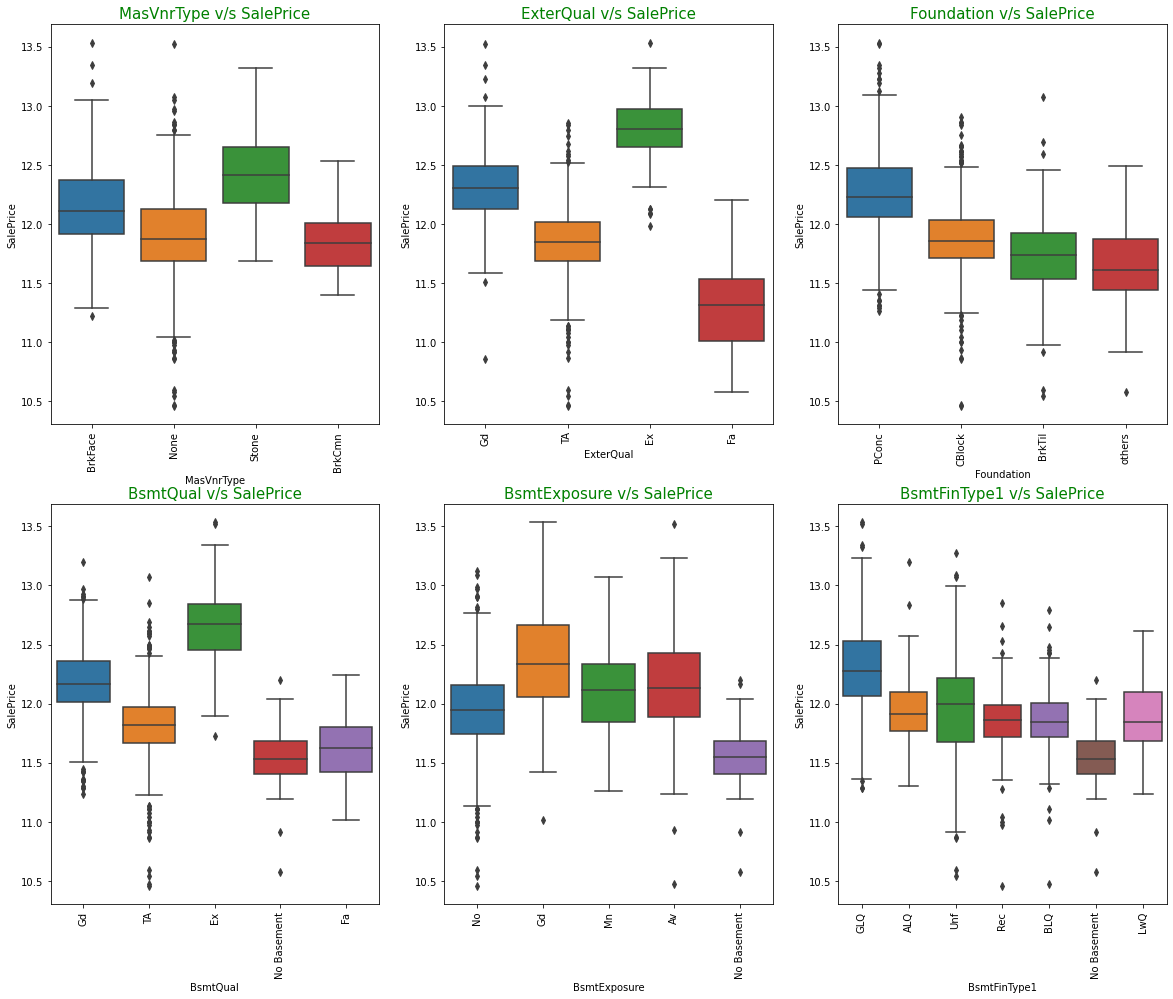

In [74]:
 #  Box plot for `Sale Price` versus 'MasVnrType', 'ExterQual','Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1'

plt.figure(figsize=(20,25))

plt.subplot(3,3,1)
boxplot('MasVnrType',90)

plt.subplot(3,3,2)
boxplot('ExterQual',90)

plt.subplot(3,3,3)
boxplot('Foundation',90)

plt.subplot(3,3,4)
boxplot('BsmtQual',90)

plt.subplot(3,3,5)
boxplot('BsmtExposure',90)

plt.subplot(3,3,6)
boxplot('BsmtFinType1',90)


plt.show()

## Insights:
- As shown above we have plotted `Sale Price` versus 'MasVnrType', 'ExterQual','Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1'

- We have many outliers as sown above but lets not treat this at this stage.And we cannot say that these are complete outliers since we are dealing with categorical versus numerical multiple catgeories can impact the target column.

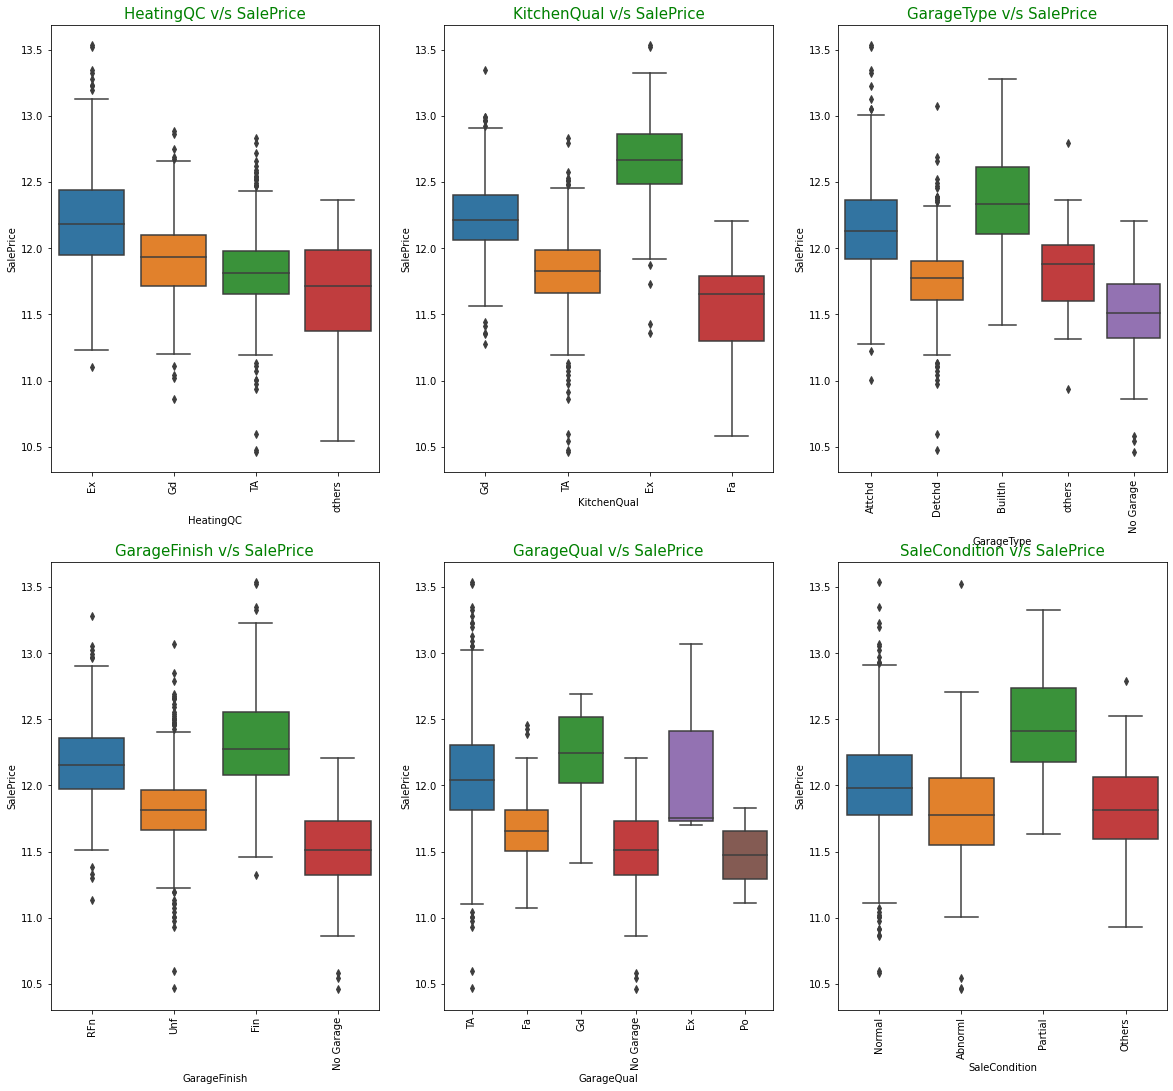

In [75]:
 #  Box plot for `Sale Price` versus 'HeatingQC','KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual','SaleCondition'
plt.figure(figsize=(20,28))

plt.subplot(3,3,1)
boxplot('HeatingQC',90)

plt.subplot(3,3,2)
boxplot('KitchenQual',90)

plt.subplot(3,3,3)
boxplot('GarageType',90)

plt.subplot(3,3,4)
boxplot('GarageFinish',90)

plt.subplot(3,3,5)
boxplot('GarageQual',90)

plt.subplot(3,3,6)
boxplot('SaleCondition',90)


plt.show()

## Insights:
- As shown above we have plotted `Sale Price` versus 'HeatingQC','KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual','SaleCondition'
- We have many outliers as shown above but lets not treat this at this stage.And we cannot say that these are complete outliers since we are dealing with categorical versus numerical multiple catgeories can impact the target column.

## Lets visualise and treat numerical columns if required

In [76]:
data2.select_dtypes(include=['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [77]:
len(data2.select_dtypes(include=['int64','float64']).columns)

34

In [78]:
data2.select_dtypes(include=['int64','float64']).head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


## Insights:
- In total we have 34 columns conatining datatype as `integer` and `float`

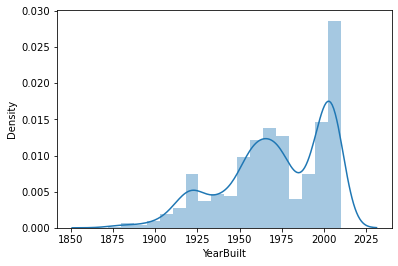

In [79]:
sns.distplot(data2['YearBuilt'])
plt.show()

## Insights:
- `YearBuilt` says the original construction year of the building
- As shown above `YearBuilt` feature has left skewed data and its not complete normally distributed.

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Density'>

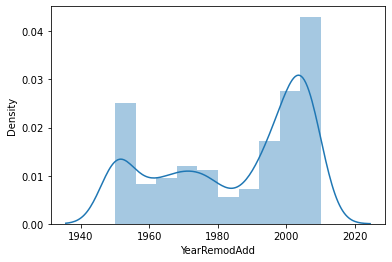

In [80]:
sns.distplot(data2['YearRemodAdd'])

## Insights:
- `YearRemodAdd` says the original construction year of the building
- As shown above `YearRemodAdd` feature has skewed data and its not complete normally distributed.

### `Extract features`: Lets create a new features called `Remodelledyearsback` and `AgeOfBuilding` which tells how many years back building was constructed and how many years back building was reconstructed

In [81]:
## Lets add a feature called `Remodelledyearsback` which tells how many years remodel has been done for the building

data2['Remodelledyearsback']=2021-data['YearRemodAdd']
data2['Remodelledyearsback']

0       18
1       45
2       19
3       51
4       21
5       26
6       16
7       48
8       71
9       71
10      56
11      15
12      59
13      14
14      61
15      20
16      51
17      54
18      17
19      56
20      15
21      71
22      19
23      45
24      20
25      14
26      21
27      13
28      24
29      71
30      71
31      15
32      14
33      62
34      16
35      16
36      26
37      31
38      14
39      66
40      56
41      62
42      38
43      41
44      62
45      16
46      18
47      15
48      13
49      55
50      24
51      71
52      58
53      34
54      66
55      57
56      21
57      17
58      15
59      49
60      17
61      25
62      15
63      71
64      23
65      16
66      32
67      18
68      71
69      68
70      48
71      15
72      23
73      18
74      71
75      48
76      65
77      20
78      53
79      40
80      53
81      23
82      14
83      61
84      25
85      29
86      16
87      12
88      39
89      26
90      71

In [82]:
## Lets add a feature called `AgeOfBuilding` which tells how many years back building was constructed
data2['AgeOfBuilding']=2021-data['YearBuilt']
data2['AgeOfBuilding']

0        18
1        45
2        20
3       106
4        21
5        28
6        17
7        48
8        90
9        82
10       56
11       16
12       59
13       15
14       61
15       92
16       51
17       54
18       17
19       63
20       16
21       91
22       19
23       45
24       53
25       14
26       70
27       14
28       64
29       94
30      101
31       55
32       14
33       62
34       16
35       17
36       27
37       67
38       68
39       66
40       56
41       62
42       38
43       46
44       62
45       16
46       18
47       15
48      101
49       55
50       24
51       87
52       58
53       40
54       66
55       57
56       22
57       17
58       15
59       49
60       17
61      101
62       15
63      100
64       24
65       17
66       51
67       18
68       76
69       68
70       48
71       39
72       23
73       67
74      106
75       48
76       65
77       73
78       53
79      111
80       53
81       23
82       14
83  

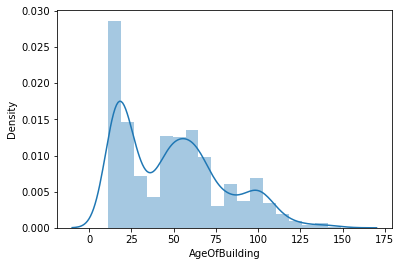

In [83]:
sns.distplot(data2['AgeOfBuilding'])
plt.show()

## Insights:
- Age of buiding is right skewed but the scale is better than`YearBuilt`
- As we know the AgeOfBuilding plays a key role in the price of the building.Lets take this varibale forward and do some modelling by considering this varibale

In [84]:
data2.drop(['YearBuilt','YearRemodAdd'],axis=1,inplace=True)

## Insights:
- Lets drop `YearBuilt` and `YearRemodAdd` since we have created new columns which indicates how old the buildings are from 2021

In [85]:
y=data2['SalePrice']
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [86]:
data2.drop('SalePrice',axis=1,inplace=True)

## Observation:
- As shown in the above two steps we have created a target variable(y) which is a `SalePrice` y and removed the same from data2 dataframe

In [87]:
# Display the top 5 rows of dataframe
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,Remodelledyearsback,AgeOfBuilding
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,0,61,0,0,0,0,0,2,2008,Normal,18,18
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,others,Veenker,Feedr,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,TA,298,0,0,0,0,0,0,5,2007,Normal,45,45
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,0,42,0,0,0,0,0,9,2008,Normal,19,20
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,TA,0,35,272,0,0,0,0,2,2006,Abnorml,51,106
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,others,NoRidge,Norm,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,TA,192,84,0,0,0,0,0,12,2008,Normal,21,21


In [88]:
# Displying the features having numerical(int and float) datatype 
data2.select_dtypes(include=['int64','float64']).head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodelledyearsback,AgeOfBuilding
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,18,18
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,45,45
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,19,20
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,51,106
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,21,21


## Categorical Column Treatment

In [89]:
# Lets treat the categorical columns

CategoricalColumns=data2.select_dtypes(include=['object'])
CategoricalColumns.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,GarageQual,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,TA,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,others,Veenker,Feedr,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,TA,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,TA,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,TA,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,others,NoRidge,Norm,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,TA,Normal


In [90]:
### Display all the categorical columns

CategoricalColumns.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleCondition'],
      dtype='object')

In [91]:
# CategoricalColumns stores dataframe of categorical columns obtained from data2
CategoricalColumns=data2[CategoricalColumns.columns]
CategoricalColumns

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,GarageQual,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,TA,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,others,Veenker,Feedr,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,TA,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,TA,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,TA,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,others,NoRidge,Norm,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,TA,Normal
5,1-1/2 STORY FINISHED ALL AGES,RL,IR1,Inside,Mitchel,Norm,1Fam,1.5Fin,Average,Average,Gable,VinylSd,VinylSd,None,TA,others,Gd,No,GLQ,Ex,TA,Attchd,Unf,TA,Normal
6,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,Inside,Somerst,Norm,1Fam,1Story,Very Good,Average,Gable,VinylSd,VinylSd,Stone,Gd,PConc,Ex,Av,GLQ,Ex,Gd,Attchd,RFn,TA,Normal
7,2-STORY 1946 & NEWER,RL,IR1,Corner,NWAmes,PosN,1Fam,2Story,Good,Above Average,Gable,HdBoard,HdBoard,Stone,TA,CBlock,Gd,Mn,ALQ,Ex,TA,Attchd,RFn,TA,Normal
8,1-1/2 STORY FINISHED ALL AGES,RM,Reg,Inside,OldTown,Artery,1Fam,1.5Fin,Good,Average,Gable,BrkFace,Wd Shng,None,TA,BrkTil,TA,No,Unf,Gd,TA,Detchd,Unf,Fa,Abnorml
9,2 FAMILY CONVERSION - ALL STYLES AND AGES,RL,Reg,Corner,BrkSide,Artery,2fmCon,1.5Unf,Average,Above Average,Gable,MetalSd,MetalSd,None,TA,BrkTil,TA,No,GLQ,Ex,TA,Attchd,RFn,Gd,Normal


## Insights:
- As shown above `CategoricalColumns` stores dataframe containing the features having datatype of categorical features

In [92]:
# CategoricalColumns2 stores dataframe after converting categorical column into integer format
CategoricalColumns2=pd.get_dummies(CategoricalColumns,drop_first=True)
CategoricalColumns2.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_others,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,HeatingQC_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Insights:

- We have used `CategoricalColumns2` for storing dataframe after converting catgeries to numerical representation
- As shown above we have used get_dummies to convert categorical columns to numerical so that we can fit the data to the model.


In [93]:
CategoricalColumns2.shape

(1460, 148)

In [94]:
# Drop original categroical columns since we created new ones using get_dummies
data2.drop(CategoricalColumns.columns,axis=1,inplace=True)

## Insights:
- We have dropped our categorical columns from original dataframe `data2` and all the categorical column are stored in `CategoricalColumns2` after treating them

In [95]:
data2.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodelledyearsback,AgeOfBuilding
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,18,18
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,45,45
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,19,20
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,51,106
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,21,21


In [96]:
data2.shape

(1460, 33)

## Insights:
- As shown above we have 33 features which are numerical in nature

In [97]:
# Create new dataframe called `newdf` which is a combination of numerical fetures and Categorical columns after the treatment
newdf=pd.concat([data2,CategoricalColumns2],axis=1)
newdf.shape

(1460, 181)

In [98]:
newdf.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodelledyearsback,AgeOfBuilding,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_others,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,HeatingQC_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,18,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,45,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0

## Insights:
- In the previous steps we have obtained the dataframe which is suitable for model building so all the input features for our model is stored in the following variable`newdf`

## Perform Train_Test_Split for Training and evalating model

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(newdf,y,train_size=0.75,random_state=42)

In [101]:
print(x_train.shape)
print(x_test.shape)

(1095, 181)
(365, 181)


In [102]:
# Let initialise the standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [103]:
x_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodelledyearsback,AgeOfBuilding,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_others,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,HeatingQC_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1023,43.0,3182,14.0,16,0,1330,1346,1504,0,0,1504,0,0,2,0,2,1,7,1,2005.0,2,437,156,20,0,0,0,0,0,5,2008,15,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
810,78.0,10140,99.0,663,377,0,1040,1309,0,0,1309,1,0,1,1,3,1,5,1,1974.0,2,484,265,0,0,0,0,648,0,1,2006,22,47,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [104]:
data2.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Remodelledyearsback', 'AgeOfBuilding'],
      dtype='object')

## Insights:
- As shown above all the column/feature names are displayed where datatype of the feature is integer

In [105]:
# Apply standard scaling on numerical column
x_train[data2.columns]=sc.fit_transform(x_train[data2.columns])
x_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodelledyearsback,AgeOfBuilding,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_others,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,HeatingQC_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1023,-1.190664,-0.683950,-0.519303,-0.944261,-0.284678,1.711873,0.642893,0.862092,-0.805280,-0.119821,-0.051643,-0.813995,-0.243017,0.772872,-0.766635,-1.112669,-0.207743,0.268177,0.591298,1.087084,0.293831,-0.192617,0.458853,-0.428838,-0.344584,-0.121808,-0.280154,-0.073333,-0.123489,-0.508139,0.137143,-1.020374,-1.107889,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

## Insights:
- As shown above the features are applied with standard scaling which are numerical in nature
- We didnt make any changes to the features where we have conveted categories to numerical representation using get_dummies

In [106]:
x_test[data2.columns]=sc.transform(x_test[data2.columns])
x_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodelledyearsback,AgeOfBuilding,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,MSZoning_others,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_others,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,HeatingQC_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
892,-0.006130,-0.210929,-0.601000,0.469362,-0.284678,-0.388597,-0.003975,-0.265240,-0.805280,-0.119821,-0.879035,-0.813995,3.980849,-1.062909,-0.766635,0.128036,-0.207743,-0.347450,-0.961392,-0.653143,-1.069494,-1.014597,0.735061,-0.718262,-0.344584,-0.121808,-0.280154,-0.073333,-0.123489,-1.627680,-1.372124,-0.875607,0.265031,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0

## Insights:
- As shown above we have applied transform on the test data for applying standard scaling 

## Model building 

In [107]:
# Importing required libraries which helps for Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [108]:
# Intialis Linear regression 
lr=LinearRegression()
lr.fit(x_train,y_train)

# Select Top 50 features using recursive feature elimination technique
rfe=RFE(lr,50)
rfe=rfe.fit(x_train,y_train)

## Insights:
- As shown above we have taken 50 top features which are best for our model building process using recursive feature elimination.

- The approach is taken, to reduce overall column count to th model since earlier we have 181 features since we had lot of categorical columns

In [109]:
# Lets display the column names,support and ranking of the selected features after applying RFE
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 89),
 ('LotArea', False, 90),
 ('MasVnrArea', False, 127),
 ('BsmtFinSF1', False, 83),
 ('BsmtFinSF2', False, 86),
 ('BsmtUnfSF', False, 85),
 ('TotalBsmtSF', False, 88),
 ('1stFlrSF', False, 25),
 ('2ndFlrSF', False, 26),
 ('LowQualFinSF', False, 82),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 22),
 ('BsmtHalfBath', False, 132),
 ('FullBath', False, 29),
 ('HalfBath', False, 43),
 ('BedroomAbvGr', False, 122),
 ('KitchenAbvGr', False, 47),
 ('TotRmsAbvGrd', False, 48),
 ('Fireplaces', False, 24),
 ('GarageYrBlt', False, 111),
 ('GarageCars', False, 10),
 ('GarageArea', False, 120),
 ('WoodDeckSF', False, 99),
 ('OpenPorchSF', False, 129),
 ('EnclosedPorch', False, 107),
 ('3SsnPorch', False, 104),
 ('ScreenPorch', False, 100),
 ('PoolArea', False, 125),
 ('MiscVal', False, 114),
 ('MoSold', False, 130),
 ('YrSold', False, 123),
 ('Remodelledyearsback', False, 78),
 ('AgeOfBuilding', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 18),
 ('M

In [110]:
# create a variable called `newcol` which holds feature names of all the top 50 selected features
newcol=x_train.columns[rfe.support_]
newcol

Index(['GrLivArea', 'AgeOfBuilding',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 'MSZoning_others',
       'LotShape_IR2', 'LotShape_IR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_RRAn', 'BldgType_Twnhs',
       'OverallQual_Average', 'OverallQual_Below Average',
       'OverallQual_Excellent', 'OverallQual_Fair', 'OverallQual_Good',
       'OverallQual_Poor', 'OverallQual_Very Good', 'OverallQual_Very Poor',
       'OverallCond_Average', 'OverallCond_Below Average', 'OverallCond_Fair',
       'Exterior1st_BrkFace', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Stucco',
       'BsmtQual_No Basement', 'BsmtExposure_Gd', 'BsmtExpo

## Insights:
- As shown above we have obtained the best 50 features which can be fitted with lasso and ridge regression models
- Now we have obtained best features after applying recursive feature elimination

In [111]:
x_train=x_train[newcol]
x_test=x_test[newcol]

In [112]:
x_train.shape

(1095, 50)

In [113]:
x_test.shape

(365, 50)

## Insights:
- As shown above we have assigned new feature names for the x_train and x_test variables
- Split of training and test is as expected with rows and columns also as expected

In [114]:
# Import Ridge and Lasso Regression models
from sklearn.linear_model import Lasso,Ridge

## Ridge Regression

In [115]:
# Import Grid search Cv
from sklearn.model_selection import GridSearchCV

In [116]:
# Lets create params which is alpha in our case and passed to our GridsearchCV which creates multiple folds.
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.,8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,50,100,100]}
ridge=Ridge()   #Initisalising Ridge
folds=5  # Number of folds
ridgemodel=GridSearchCV(estimator=ridge,  #estimator here is ridge
                     param_grid=params,
                     cv=folds,
                     scoring='neg_mean_absolute_error',
                     return_train_score=True,
                     verbose=1)
ridgemodel.fit(x_train,y_train)  # Fit the model

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.0, 8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 50,
                                   100, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
# ilter bet params value for our model which is best alpha in this case
ridgemodel.best_params_

{'alpha': 6.0}

## Insights:
- As shown in the previous two steps we have applied Gridsearch with ridge estimator and obtained 135 fits.
- We have obtained best alpha value as 4.0,Lets fit and train the model with this alpha value in next step

In [118]:
## Lets fit the model with the alpha value 6
alpha=6.0,
ridge=Ridge(alpha=alpha)
ridge.fit(x_train,y_train)
print(ridge.coef_)

[ 0.174983   -0.10560109  0.07070396 -0.16247818 -0.08398731 -0.07918896
  0.06838728 -0.06677119  0.1029813   0.13875531 -0.04517589  0.04087369
  0.09689233  0.15595654  0.0950114   0.13067584  0.06143185  0.07629029
  0.05432217  0.06110239 -0.07139065 -0.06306576 -0.11316602  0.22578634
 -0.17742046  0.05891822 -0.05691292  0.13733478 -0.13087972 -0.07200653
 -0.10291568 -0.20459765  0.08292176 -0.02505667 -0.04537173 -0.05849497
  0.0922445  -0.05849497 -0.05849497 -0.05374314 -0.12616587 -0.05714275
 -0.12026408 -0.05445214 -0.05445214 -0.05442019  0.03239657 -0.05445214
 -0.00922732 -0.01331927]


In [119]:
RidgeCoeff=pd.DataFrame(index=x_train.columns,data=sorted(ridge.coef_,reverse=True),columns=['Coef'])
RidgeCoeff

,Coef
GrLivArea,0.225786
AgeOfBuilding,0.174983
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.155957
MSSubClass_2-STORY PUD - 1946 & NEWER,0.138755
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,0.137335
MSZoning_others,0.130676
LotShape_IR2,0.102981
LotShape_IR3,0.096892
Neighborhood_ClearCr,0.095011
Neighborhood_Crawfor,0.092245


## Insights:
- As shown above all the coefficient values are shown along with its features.

In [120]:
ridge.score(x_train,y_train)

0.8743159279148796

In [121]:
ridge.score(x_test,y_test)

0.8798514204622434

## Insights:
- Train and Test results wth Ridge Reression
    - Training score: 0.87
    - Test score    : 0.87

In [122]:
## Top 5 features using Ridge
RidgeCoeff.head(5)

,Coef
GrLivArea,0.225786
AgeOfBuilding,0.174983
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.155957
MSSubClass_2-STORY PUD - 1946 & NEWER,0.138755
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,0.137335


## Lasso

In [123]:
from sklearn.linear_model import Lasso

In [124]:
# Lets crete params which is alpha in our case and passed to our GridsearchCV model which creates multiple folds.
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.,8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,50,100,100]}
lasso=Lasso()   #Initialising Lasso 
folds=5   #Number of folds
lassomodel=GridSearchCV(estimator=lasso,   #estimator here is lasso
                     param_grid=params,
                     cv=folds,
                     scoring='neg_mean_absolute_error',
                     return_train_score=True,
                     verbose=1)
lassomodel.fit(x_train,y_train)  # fit the model

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.0, 8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 50,
                                   100, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
# Filter the best params value for alpha
lassomodel.best_params_

{'alpha': 0.001}

## Insights:
- As shown in the previous two steps we have applied Gridsearch with Lassos estimator and obtained 135 fits.
- We have obtained best alpha value as 0.001,Lets fit and train the model with this alpha value in next step

In [126]:
## Lets fit the model with the alpha value 0.001
alpha=0.001,
lasso=Lasso(alpha=alpha)
lasso.fit(x_train,y_train)
print(lasso.coef_)

[ 1.79860945e-01 -1.14031052e-01  7.18472735e-02 -1.60554120e-01
 -3.26564385e-03 -4.90324492e-02  5.36076956e-02 -0.00000000e+00
  8.10776728e-02  1.26874616e-01 -8.19691825e-03  0.00000000e+00
  6.20603738e-02  1.39449379e-01  7.46805123e-02  1.04782382e-01
  2.50493818e-02  5.80310617e-03  4.23985934e-02  4.45611215e-03
 -5.31889661e-02 -5.85951633e-02 -1.13874771e-01  2.67298741e-01
 -1.85174727e-01  5.53707296e-02 -0.00000000e+00  1.52495432e-01
 -0.00000000e+00 -7.27048055e-02 -9.60400125e-02 -2.28233470e-01
  7.07330760e-02 -0.00000000e+00 -1.98791187e-03 -1.47305500e-01
  8.72665402e-02 -4.36995092e-05 -0.00000000e+00 -5.15431731e-02
 -9.20900302e-02 -1.83153258e-02 -8.27958013e-02 -1.44248509e-01
 -0.00000000e+00 -6.16311524e-03  0.00000000e+00 -4.99940756e-04
 -0.00000000e+00  0.00000000e+00]


In [127]:
LassoCoeff=pd.DataFrame(index=x_train.columns,data=sorted(lasso.coef_,reverse=True),columns=['Coef'])
LassoCoeff

,Coef
GrLivArea,0.267299
AgeOfBuilding,0.179861
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.152495
MSSubClass_2-STORY PUD - 1946 & NEWER,0.139449
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,0.126875
MSZoning_others,0.104782
LotShape_IR2,0.087267
LotShape_IR3,0.081078
Neighborhood_ClearCr,0.074681
Neighborhood_Crawfor,0.071847


## Insights:
- As shown above all the coefficient values are shown along with its features.
- We could see that coefficient values are 0 for variables like `Condition1_Norm`, `Condition1_RRAn`, `BldgType_Twnhs`,`OverallQual_Average`,`OverallQual_Below Average`,`OverallQual_Excellent`,`OverallQual_Fair`,`OverallQual_Good`,`OverallQual_Poor`,`OverallQual_Very Good` indicating less significance in preddicting the house prices.

In [128]:
lasso.score(x_train,y_train)

0.8660160486303233

In [129]:
lasso.score(x_test,y_test)

0.8704866737749191

## Insights:
- Train and Test results wth Lasso Reression
    - Training score: 0.866
    - Test score    : 0.87

In [130]:
## Top 5 features using lasso
LassoCoeff.head(5)

,Coef
GrLivArea,0.267299
AgeOfBuilding,0.179861
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.152495
MSSubClass_2-STORY PUD - 1946 & NEWER,0.139449
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,0.126875


## Summary of the Analysis

## Optimal Value for Ridge and Lasso:

    - Optimal lambda value for Ridge : 6.0
    - Optimal lambda value for lasso : 0.001

## Variables significant in preicting the price of the house using Ridge Regression are as follows:

In [131]:
RidgeCoeff.head(5)  

,Coef
GrLivArea,0.225786
AgeOfBuilding,0.174983
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.155957
MSSubClass_2-STORY PUD - 1946 & NEWER,0.138755
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,0.137335


## Variables significant in predicting the price of the house using Lasso Regression are as follows:

In [132]:
LassoCoeff.head()

,Coef
GrLivArea,0.267299
AgeOfBuilding,0.179861
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.152495
MSSubClass_2-STORY PUD - 1946 & NEWER,0.139449
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,0.126875


## Metrics obtained using ridge and Lasso:
- Ridge regression:
    - Training: 0.87
    - Testing: 0.87
- lasso regression:
    - Training: 0.866
    - Testing:  0.87

## From both Ridge and Lasso Below variables shows strong Predictors in making predictions of houses, So company can concentrate on this variables :
- GrLivArea
- AgeOfBuilding
- MSSubClass_1-STORY 1946 & NEWER ALL STYLES
- MSSubClass_2-STORY PUD - 1946 & NEWER
- MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER